# 4. 正則化

過学習が起こるのは

- パラメータを大量に持ち、表現力の高いモデルである
- 訓練データが少ない

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'sample')))

epoch:0, train acc:0.09333333333333334, test acc:0.1056
epoch:1, train acc:0.10666666666666667, test acc:0.1176
epoch:2, train acc:0.16, test acc:0.1435
epoch:3, train acc:0.19, test acc:0.1634
epoch:4, train acc:0.22666666666666666, test acc:0.1913
epoch:5, train acc:0.23333333333333334, test acc:0.2093
epoch:6, train acc:0.24, test acc:0.2246
epoch:7, train acc:0.25333333333333335, test acc:0.2352
epoch:8, train acc:0.27, test acc:0.2472
epoch:9, train acc:0.28, test acc:0.2553
epoch:10, train acc:0.29, test acc:0.2679
epoch:11, train acc:0.31666666666666665, test acc:0.2784
epoch:12, train acc:0.33666666666666667, test acc:0.2893
epoch:13, train acc:0.36, test acc:0.3046
epoch:14, train acc:0.36333333333333334, test acc:0.3098
epoch:15, train acc:0.38333333333333336, test acc:0.322
epoch:16, train acc:0.4033333333333333, test acc:0.3384
epoch:17, train acc:0.41, test acc:0.3432
epoch:18, train acc:0.43, test acc:0.3521
epoch:19, train acc:0.44333333333333336, test acc:0.3763
epoch:2

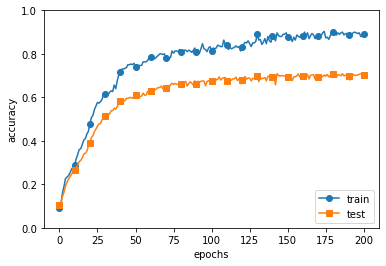

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データはほぼほぼ正解に近いが、テストデータの結果が良くない状態。

## Weight decay

バカでっかい値

特定のニューロンの重みが大きいとき、そのウェイトを小さくする。
具体的には、ラムダプライムというペナルティを与える。

L2のむる (重みの2乗)を損失関数に与えることで、重みが大きくなるのを抑える。

ノルム = ベクトルの大きさのようなもの。
ノルムを計算することで、重みデータがとれる範囲を制限している

## Dropout

複雑なニューロンの一部を使わなくする。

計算後にDropout率をかける。例えば出力時。

テスト時はDropoutさせないが、ドロップアウトさせたときと同じスケールになるような計算を入れる。
Dropoutするニューロンはランダムなので、どれがDropoutになるかはわからない。

Dropout率は、だいたい0.3~0.5くらいにすることが多い。
あんまり大きいと、使っていないのと同義になるので大きくすることはない。